### A perceptron is the simplest form of a neural network, a single artificial neuron that takes multiple inputs, multiplies them by weights, sums them up, and applies an activation function to produce a single binary output.And is used for binary classification tasks, learning by adjusting its weights to reduce the error between its prediction and the target output

Please upload your image file(s):


Saving images1.png to images1.png
Uploaded file: "images1.png"


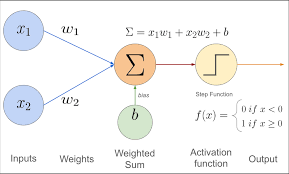

In [ ]:
from google.colab import files
from IPython.display import Image, display

print("Please upload your image file(s):")
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file: "{filename}"')
  display(Image(filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df['Species'] = df['Species'].replace({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['Species'].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,50


In [ ]:
X = df[['PetalLengthCm', 'PetalWidthCm']]
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
y = df['Species']
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [ ]:
y = y.map(species_map)
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Convert Multiclassification problem to Binary Classification

In [ ]:
y = (y==0)
y

,Species
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
y = (y==0).astype(int)
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,1
147,1
148,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

Perceptron(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_test.to_numpy()

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy,{acc*100}%')

Accuracy,100.0%
